Animation of the Rabi Oscillations (two-state system, driven with external field). First, imports.

In [41]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from qutip.ipynbtools import plot_animation

Schrodinger solver, returns $(<\sigma_x>, <\sigma_y>, <\sigma_z>)$. First, time coefficient of the field.

In [42]:
def Hf_coeff(t, args):
    return np.cos(args['w_rf']*t)

In [43]:
def qubit_integrate(wq, Om, w_rf, psi0, tlist):
    # operators
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    # Hamiltonian
    Hq = 0.5*wq*sz
    Hf = Om*sx
    H = [Hq, [Hf, Hf_coeff]]
    
    # solve and return expectations
    args = {'w_rf':w_rf}
    output = sesolve(H, psi0, tlist, [sx, sy, sz], args=args)
    return output

Numerical parameters of the system:

In [44]:
wq = 2e0 # qubit freq.
Om = 1e2 # drive amplitude
w_rf = 2e0 # drive freq.


Initial state, time values, and expectation values (obtained) for plotting.

In [45]:
psi0 = basis(2, 0)
tlist = np.linspace(0,5e-1,1000)
result = qubit_integrate(wq, Om, w_rf, psi0, tlist)

Create and save the animation - couldn't do it, just printing out some points.

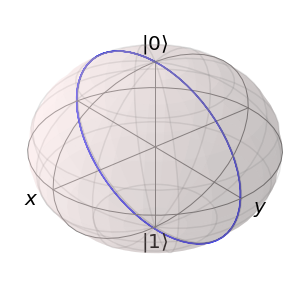

<Figure size 360x360 with 0 Axes>

In [56]:
fig = plt.figure()
axes = Axes3D(fig, azim=-40,elev=30)
sphere = Bloch(axes=axes)
num_points = 150
sphere.add_points([result.expect[0][:num_points], result.expect[1][:num_points], result.expect[2][:num_points]], meth='l')
sphere.make_sphere()
plt.show()